In [298]:
import lux
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn

import json

from sklearn import preprocessing

In [299]:
def parseData(row):
    return datetime.strptime(row['Data'], "%Y-%m-%d")

### Célula abaixo faz todos os cálculos detalhados abaixo da chamada da célula seguinte para executar direto ao ponto

Mais abaixo pode se encontrar o algoritmo explicado passo a passo

In [300]:
def getCity(city, cities):
    dataframe = cities[cities['City'] == city]
    dataframe = dataframe[['16-06', '22-06', '29-06', '06-07', '13-07', '20-07', '10-08', '18-08', '24-08', '01-09', '07-09', '15-09', '21-09']]
    return dataframe.sum()

def groupCovid(df, start, end):
    #agrupa casos por semana
    df = df.sort_values(by="Data")
    df = df[(df['Data'] >= start) & (df['Data'] <= end)]
    
    groupedByWeek = df.groupby(df['Data'].dt.strftime('%W'))['casos']
    
    return groupedByWeek.sum()

def analyzeCity(cityAnalyzed, weeksAfter):
    covid = pd.read_csv('./data/casos/covid-cases.csv')

    #remover colunas unamed
    covid.drop(covid.columns[covid.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
    covid['Data'] = covid.apply (lambda row: parseData(row), axis=1)
    df = covid[covid['cidade'] == cityAnalyzed]
    cities = pd.read_csv('./data/distribuicao-tweets/distribuitionWithCity.csv')

    tweetsNormalizados = getCity(cityAnalyzed, cities)

    #normaliza dados
    tweetsNormalizados=(tweetsNormalizados-tweetsNormalizados.min())/(tweetsNormalizados.max()-tweetsNormalizados.min())
    covidDataByWeek = groupCovid(df, "2020-06-30", "2020-09-21")

    #normaliza dados
    covidDataByWeek=(covidDataByWeek-covidDataByWeek.min())/(covidDataByWeek.max()-covidDataByWeek.min())
    dfTweets = pd.DataFrame({'data':tweetsNormalizados.index, 'tweets na semana':tweetsNormalizados.values})
    dfTweets["id"] = dfTweets.index

    dfCasos = pd.DataFrame({'semana':covidDataByWeek.index, 'casos de covid na semana':covidDataByWeek.values})
    dfCasos["id"] = dfCasos.index + weeksAfter #compara com casos X semanas seguintes
    
    dadosAgrupados = pd.concat([dfTweets])
    dadosAgrupados = pd.merge(dadosAgrupados, dfCasos, on='id')
    dadosAgrupados = dadosAgrupados[['data', 'semana', 'tweets na semana', 'casos de covid na semana']]

    return dadosAgrupados    

Exibe matriz de correlação dos casos de covid para as X semanas seguintes, de 0 a 4 semanas. Ex.:

Os tweets da semana atual, corresponde aos casos de covid de X semanas depois com Y de correlação


Correlações cidade - São Paulo



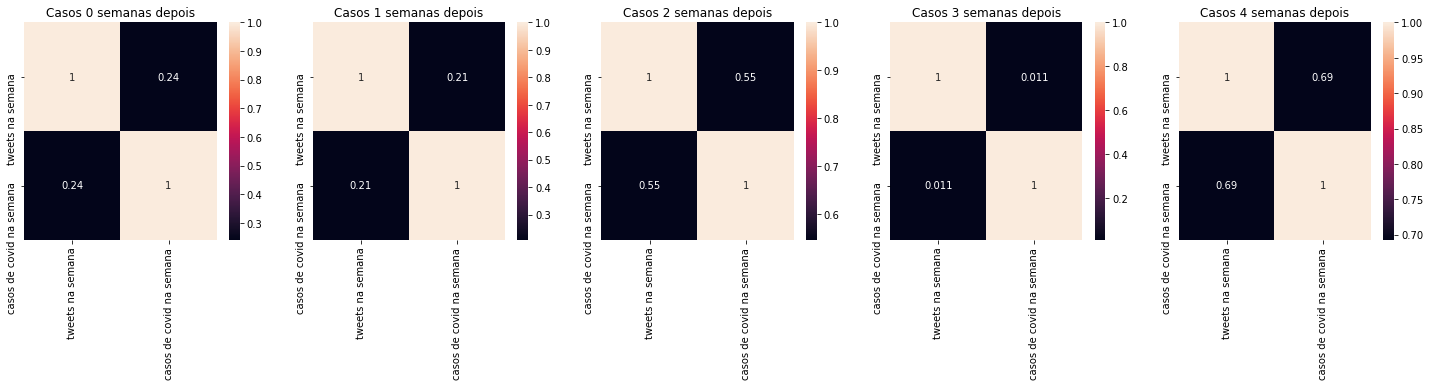


Correlações cidade - Rio de Janeiro



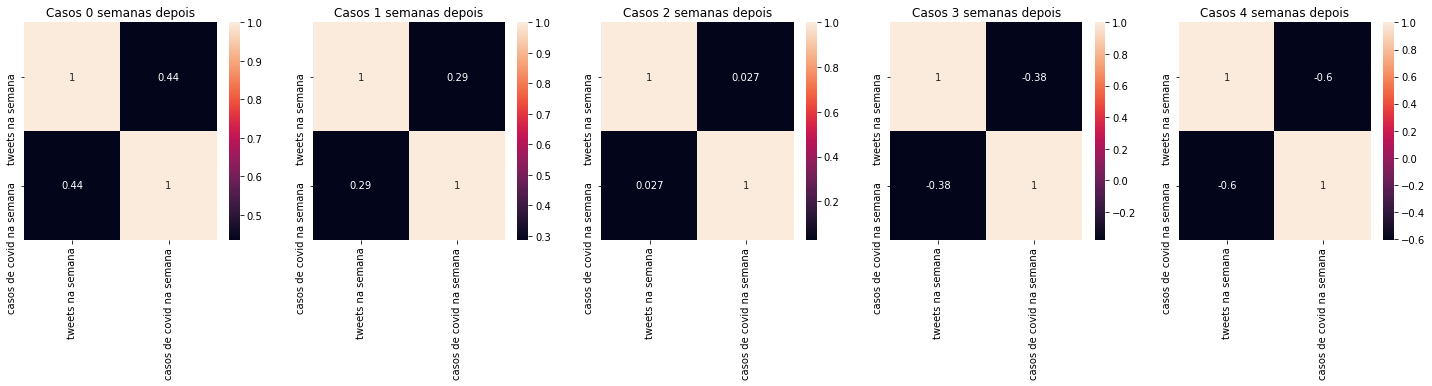


Correlações cidade - Belo Horizonte



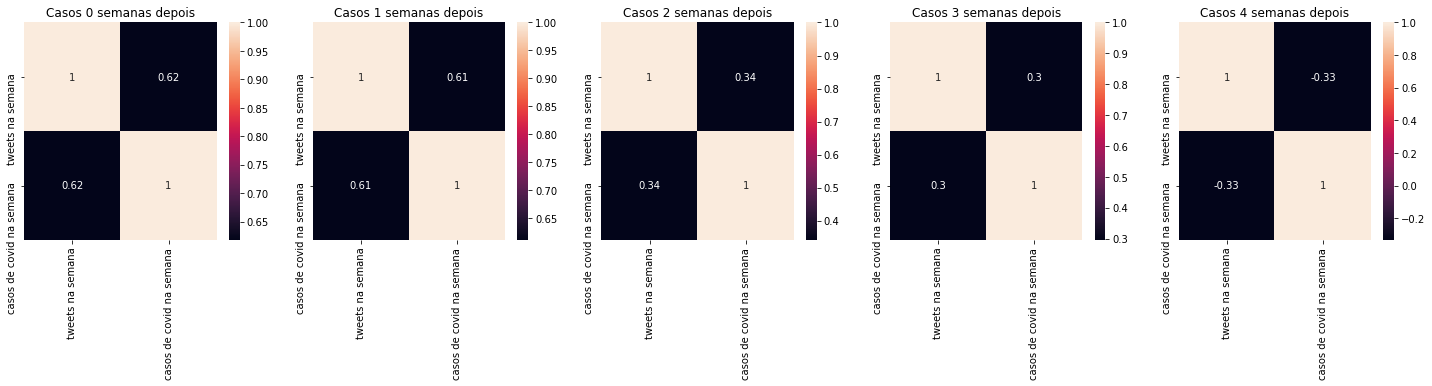


Correlações cidade - Fortaleza



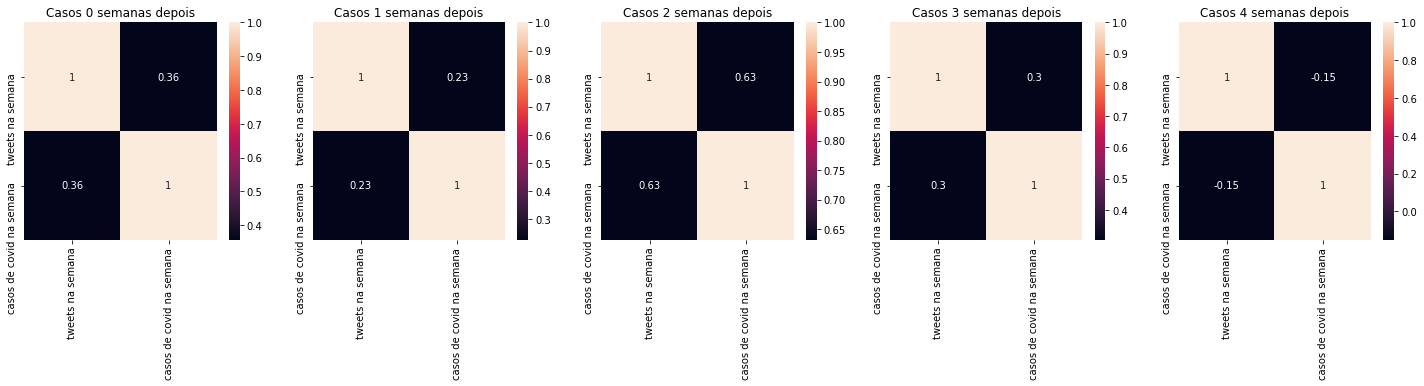


Correlações cidade - Porto Alegre



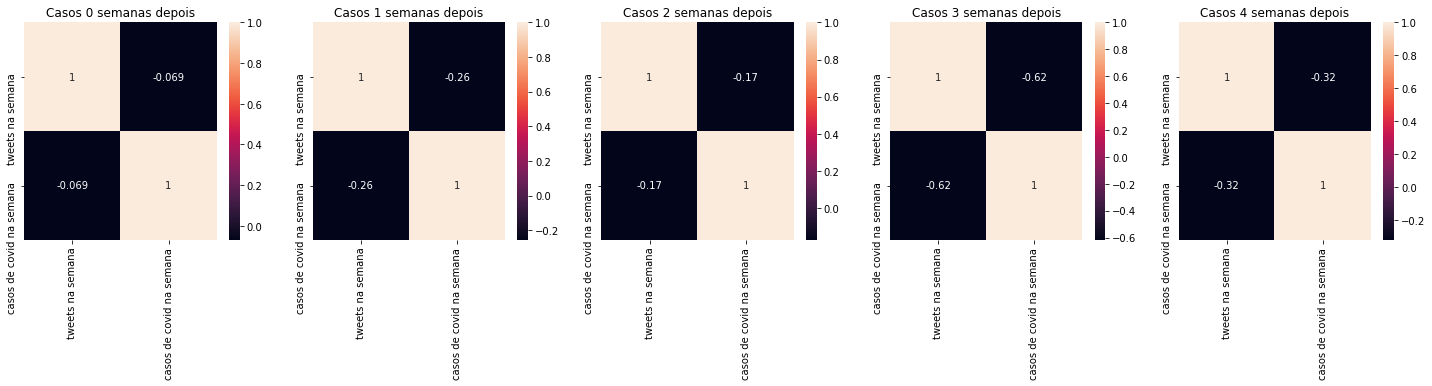


Correlações cidade - Recife



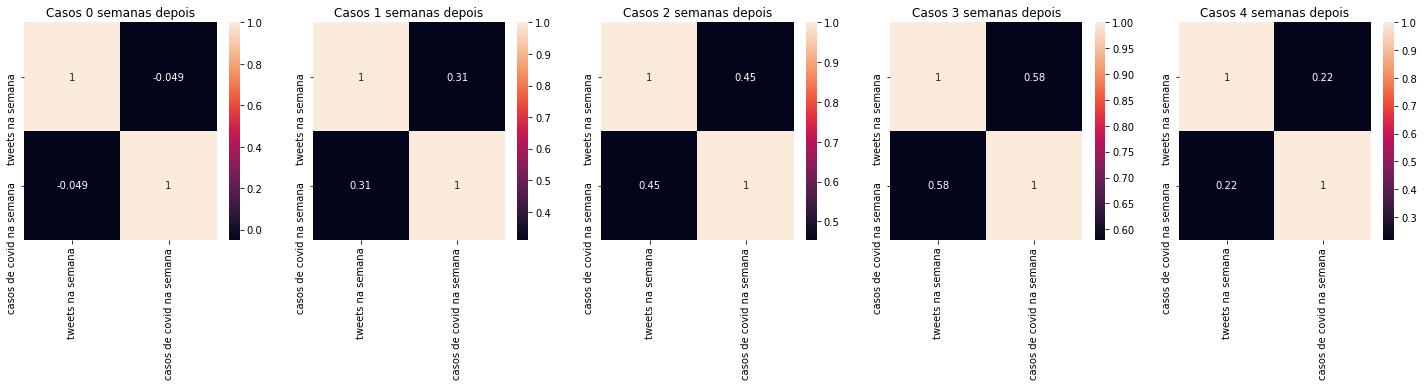


Correlações cidade - Manaus



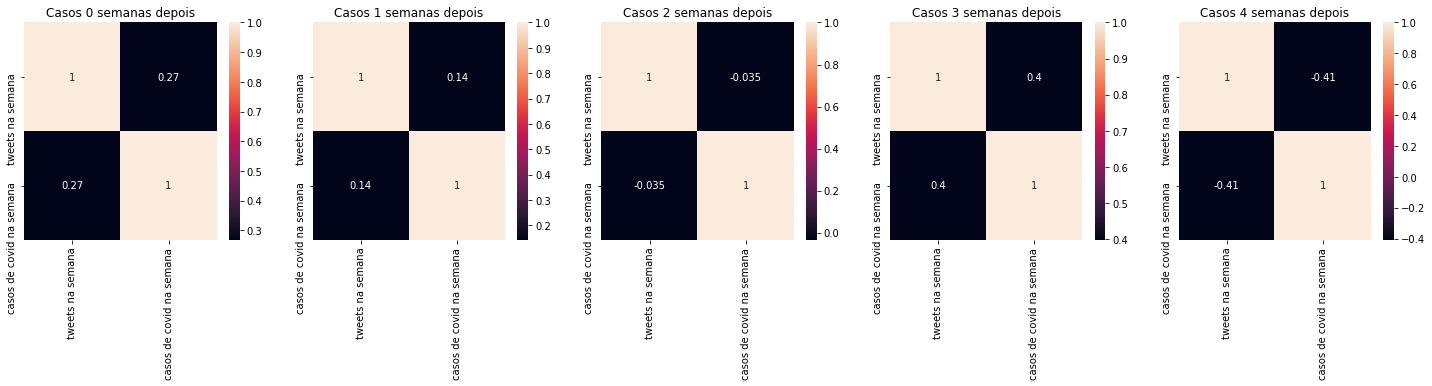


Correlações cidade - Salvador



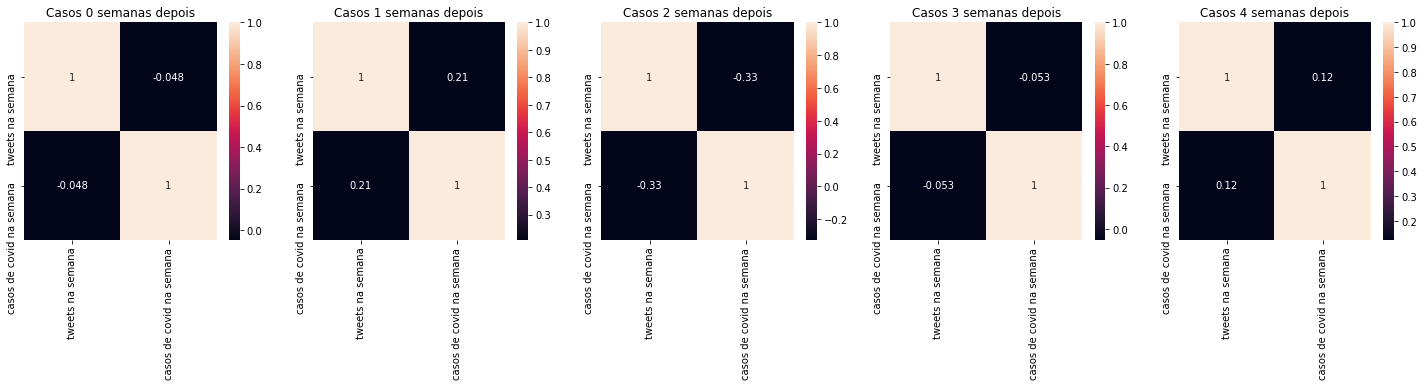

In [301]:
cityAnalyzed = ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "Fortaleza", "Porto Alegre", "Recife", "Manaus", "Salvador"]
weeksAfter = [0, 1, 2, 3, 4]

for city in cityAnalyzed:
    print("\nCorrelações cidade - "+city+"\n")
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 4))
    index = 0
    for weeks in weeksAfter:
        df = analyzeCity(city, weeks)
        corrMatrix = df.corr()
        sn.heatmap(corrMatrix, annot=True, ax=axes[index]).set_title("Casos "+str(index)+" semanas depois")
        index += 1        

    plt.show()

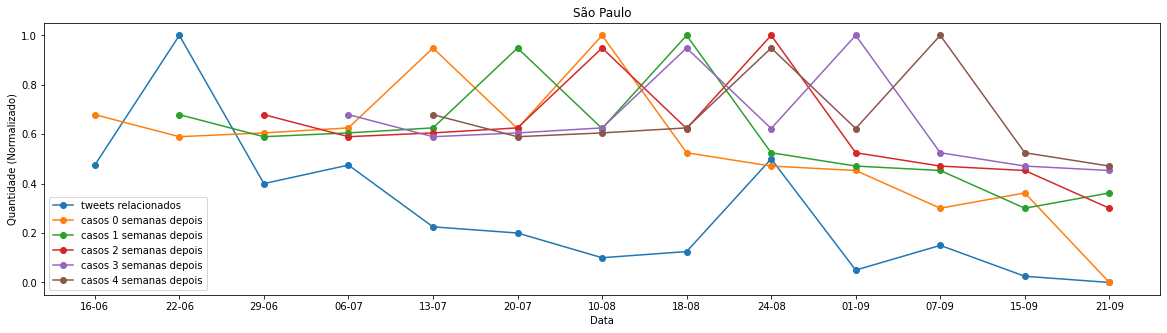

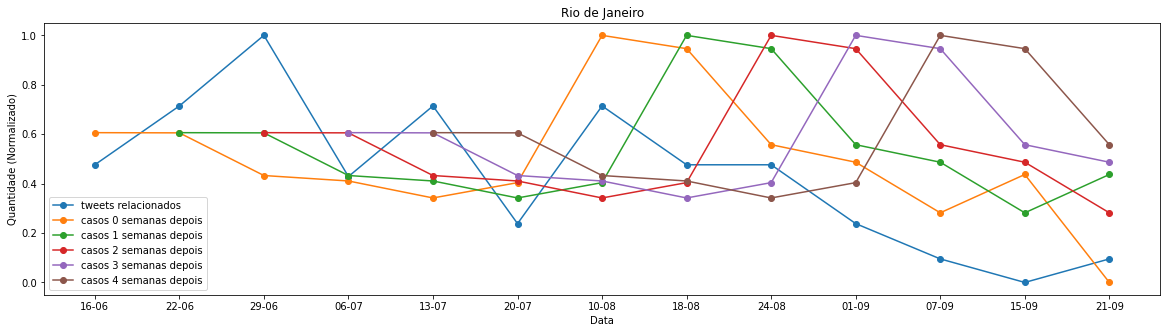

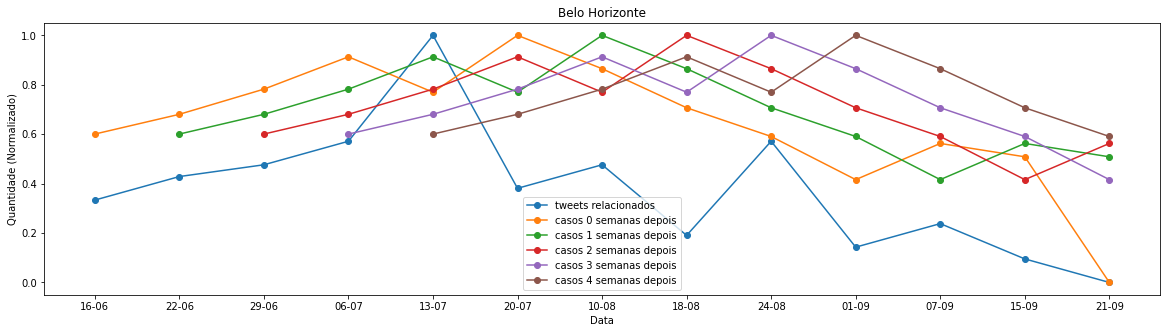

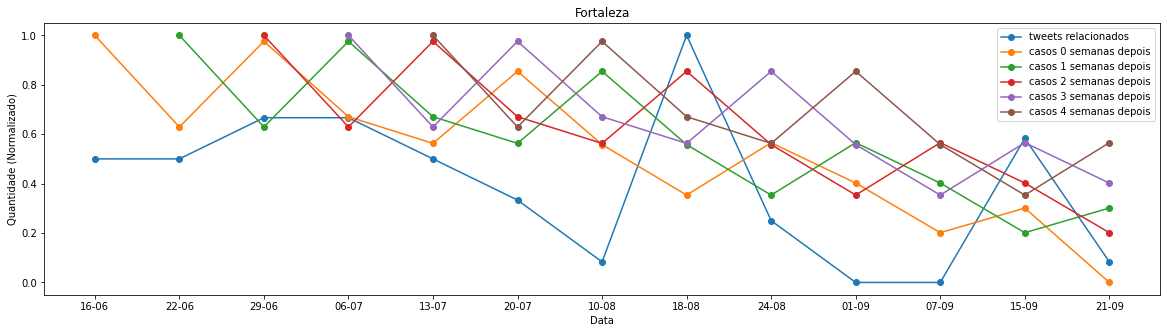

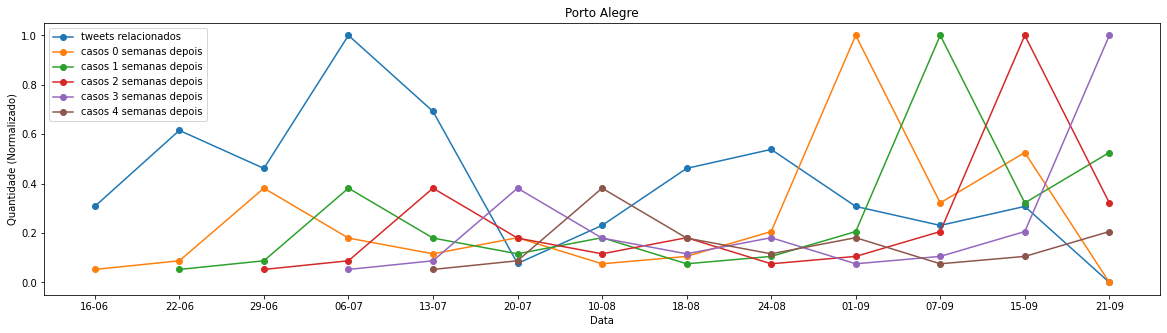

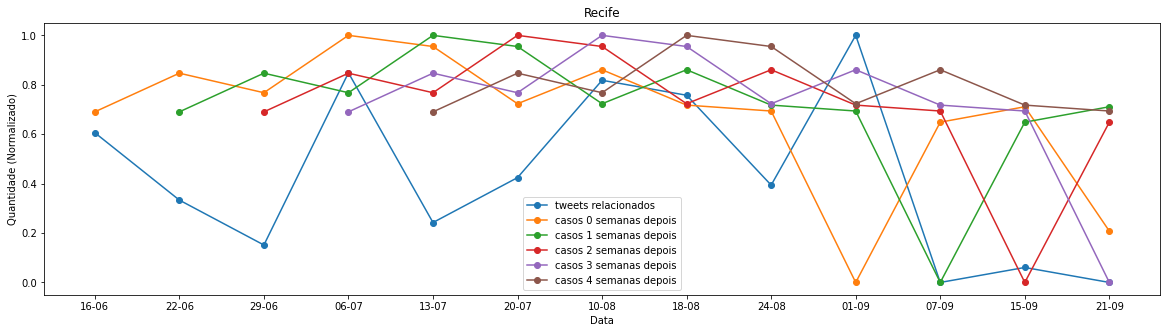

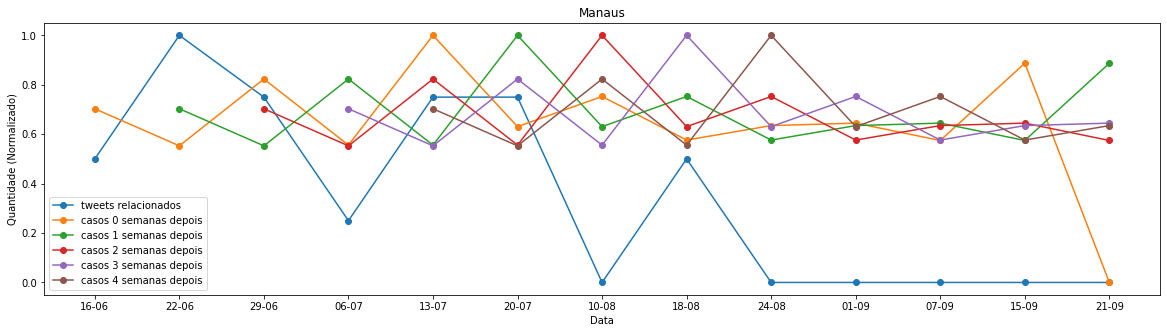

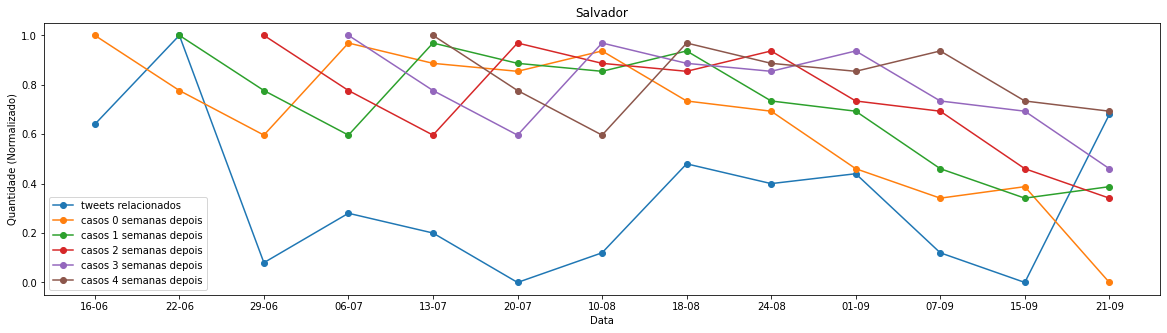

In [302]:
def plotUniqueGraph(dataByCity, city):    
    index = 0

    plt.figure(figsize=(20,5))

    #Plota a linha de tweets
    x = dataByCity[0]['data']
    line = dataByCity[0]['tweets na semana']
    plt.plot(x, line, marker='o', label="tweets relacionados")

    #Plota as linhas por semana
    for week in dataByCity:
        x = week['data']
        line = week['casos de covid na semana']
        plt.plot(x, line, marker='o', label="casos "+str(index)+" semanas depois")
        index += 1
    
    plt.title(city)
    plt.xlabel("Data")
    plt.ylabel("Quantidade (Normalizado)")

    plt.legend()

    plt.show()

cityAnalyzed = ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "Fortaleza", "Porto Alegre", "Recife", "Manaus", "Salvador"]
weeksAfter = [0, 1, 2, 3, 4]

for city in cityAnalyzed:
    dataByCity = []

    for weeks in weeksAfter:
        dataByCity.append(analyzeCity(city, weeks))

    plotUniqueGraph(dataByCity, city)

<Figure size 1440x360 with 0 Axes>

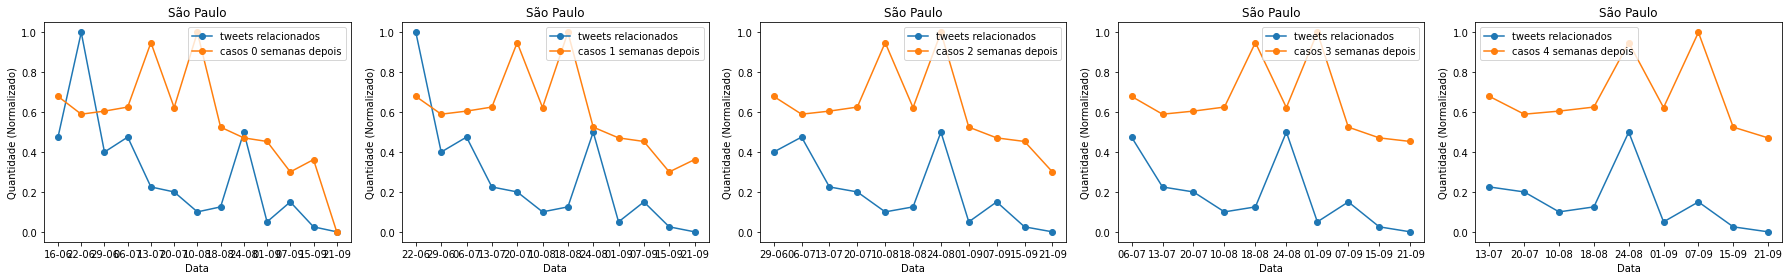

<Figure size 1440x360 with 0 Axes>

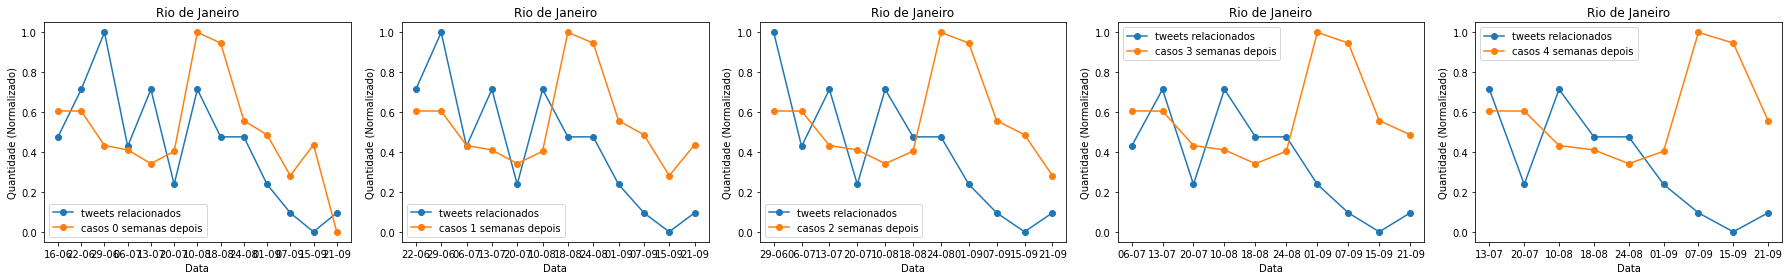

<Figure size 1440x360 with 0 Axes>

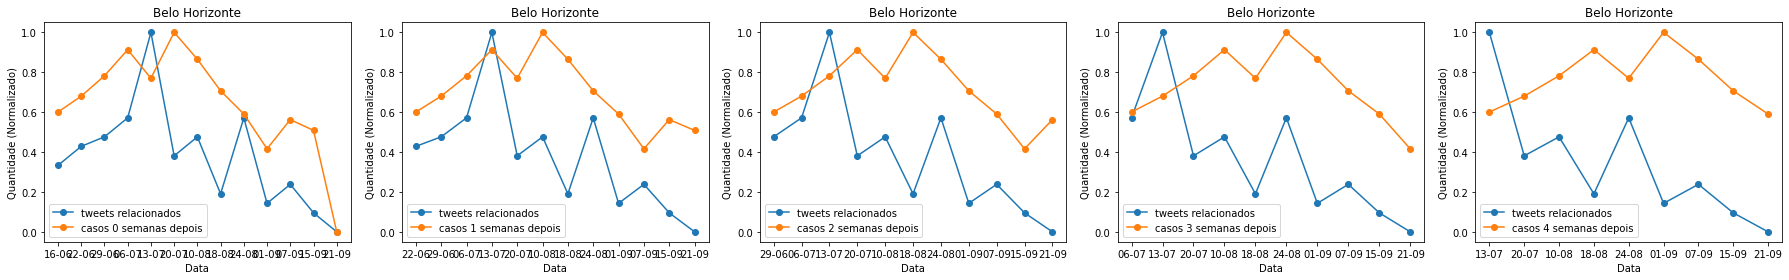

<Figure size 1440x360 with 0 Axes>

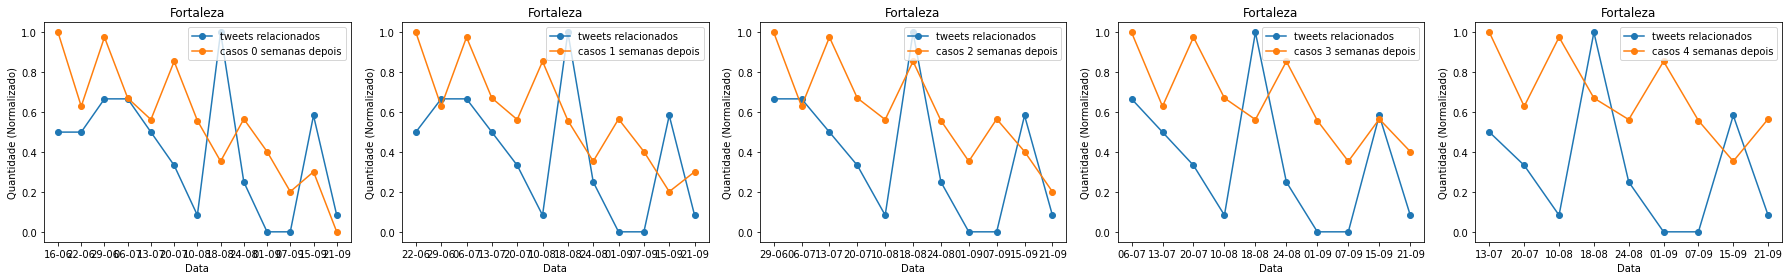

<Figure size 1440x360 with 0 Axes>

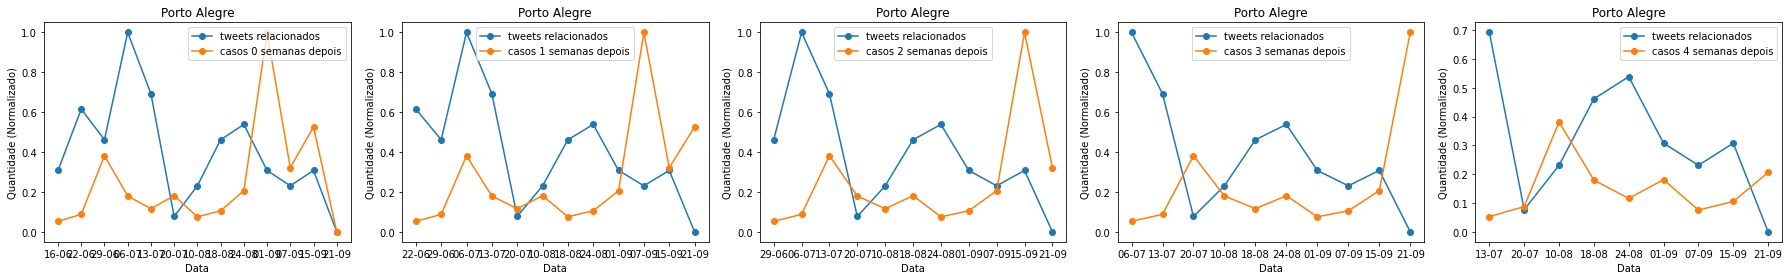

<Figure size 1440x360 with 0 Axes>

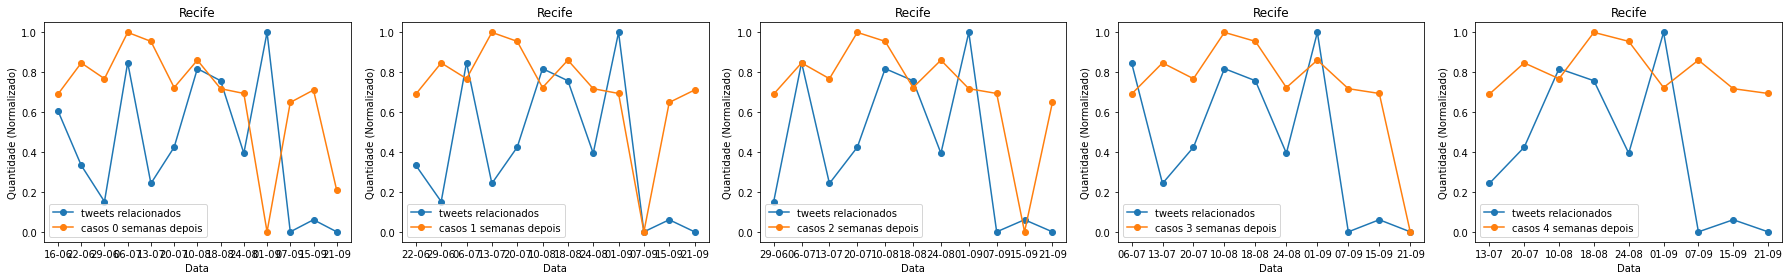

<Figure size 1440x360 with 0 Axes>

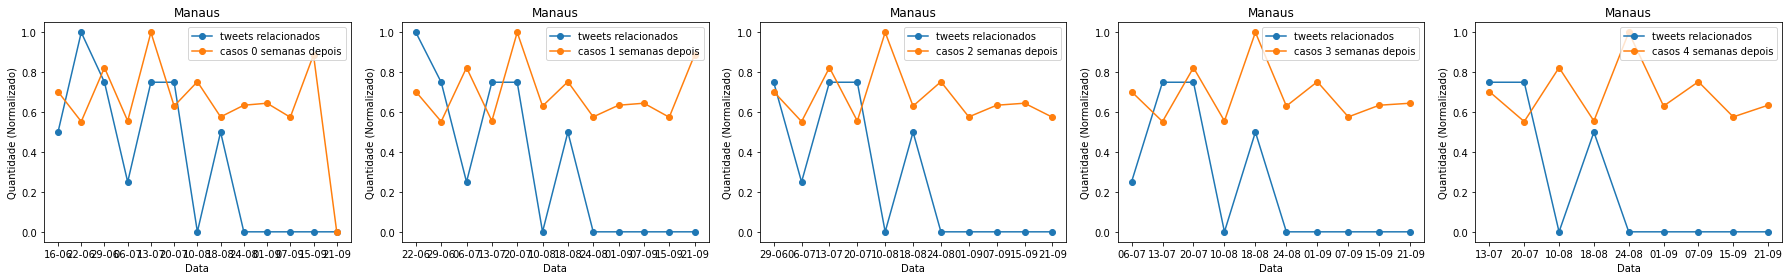

<Figure size 1440x360 with 0 Axes>

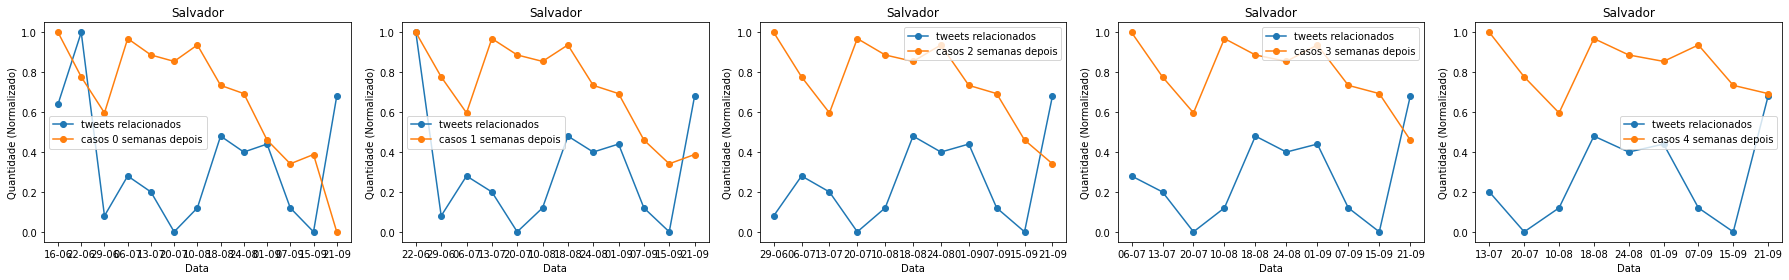

In [303]:
def plotSideBySideGraphs(dataByCity, city):    
    index = 0

    plt.figure(figsize=(20,5))

    #Plota a linha de tweets
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 4))

    #Plota as linhas por semana
    for week in dataByCity:
        x = week['data']
        line = week['casos de covid na semana']
        tweets = week['tweets na semana']

        axes[index].plot(x, tweets, marker='o', label="tweets relacionados")
        axes[index].plot(x, line, marker='o', label="casos "+str(index)+" semanas depois")        

        axes[index].legend()        
        axes[index].set_xlabel("Data")
        axes[index].set_ylabel("Quantidade (Normalizado)")
        axes[index].set_title(city)

        index += 1
    
    return fig.tight_layout()

cityAnalyzed = ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "Fortaleza", "Porto Alegre", "Recife", "Manaus", "Salvador"]
weeksAfter = [0, 1, 2, 3, 4]

for city in cityAnalyzed:
    dataByCity = []

    for weeks in weeksAfter:
        dataByCity.append(analyzeCity(city, weeks))

    plotSideBySideGraphs(dataByCity, city)

# Melhores resultados - análise manual

## Analizando tweets depois das semanas

### Casos de covid dessa semana correspondem aos tweets de X semanas seguintes

---

- São Paulo - tweets de 3 semanas depois refletem os casos dessa semana com 0.747133 corr
- Rio de Janeiro - tweets de 4 semanas depois refletem os casos dessa semana com 0.332881 corr
- Belo Horizonte - tweets de 1 semana depois refletem os casos dessa semana com 0.649819 corr
- Fortaleza - tweets de 2 semanas depois refletem os casos dessa semana com 0.493213 corr
- Porto Alegre - tweets de 4 semanas depois refletem os casos dessa semana com -0.605307 corr
- Recife - tweets de 3 semanas depois refletem os casos dessa semana com -0.516005 corr
- Manaus - tweets de 4 semanas depois refletem os casos dessa semana com 0.497384 corr
- Salvador - não houve boa correlação em nenhum dos períodos

## Analizando semanas depois dos tweets

### Tweets dessa semana correspondem aos casos de covid de X semanas seguintes

---

- São Paulo - casos de 4 semanas depois refletem os tweets dessa semana com 0.692619 corr
- Rio de Janeiro - casos de 4 semanas depois refletem os tweets dessa semana com -0.604875 corr
- Belo Horizonte - casos de 1 semana depois refletem os tweets dessa semana com 0.61064 corr
- Fortaleza - casos de 2 semanas depois refletem os tweets dessa semana com 0.631897 corr
- Porto Alegre - casos de 3 semanas depois refletem os tweets dessa semana com -0.617216 corr
- Recife - casos de 3 semanas depois refletem os tweets dessa semana com 0.579416 corr
- Manaus - casos de 4 semanas depois refletem os tweets dessa semana com -0.408583 corr
- Salvador - casos de 2 semanas depois refletem os tweets dessa semana com -0.326249 corr


# Algoritmo detalhado passo a passo

In [304]:
cityAnalyzed = "São Paulo"
weeksAfter = 3

covid = pd.read_csv('./data/casos/covid-cases.csv')

#remover colunas unamed
covid.drop(covid.columns[covid.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

covid['Data'] = covid.apply (lambda row: parseData(row), axis=1)

covid.head(10)

cidade       Data  casos
0  São Paulo 2020-02-25      1
1  São Paulo 2020-02-26      0
2  São Paulo 2020-02-27      0
3  São Paulo 2020-02-28      1
4  São Paulo 2020-02-29      0
5  São Paulo 2020-03-01      0
6  São Paulo 2020-03-02      0
7  São Paulo 2020-03-03      0
8  São Paulo 2020-03-04      1
9  São Paulo 2020-03-05      3

In [305]:
def cityToAnalyze(city):
    return covid[covid['cidade'] == city]

df = cityToAnalyze(cityAnalyzed)

### Plota gráfico de casos de covid para a cidade selecionada

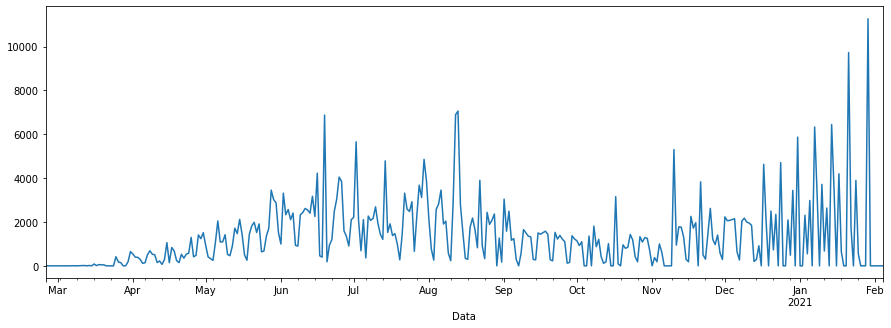

In [306]:
df.groupby('Data', sort=False)['casos'].sum().plot(kind="line", figsize=(15, 5))
plt.show()

### Lê os dados de tweets e seleciona as semanas por cidade

In [307]:
cities = pd.read_csv('./data/distribuicao-tweets/distribuitionWithCity.csv')

def getCity(city):
    dataframe = cities[cities['City'] == city]
    
    dataframe = dataframe[['16-06', '22-06', '29-06', '06-07', '13-07', '20-07', '10-08', '18-08', '24-08', '01-09', '07-09', '15-09', '21-09']]    

    return dataframe.sum()

### Plota devidamente o gráfico com as semanas e os tweets relacionados a covid

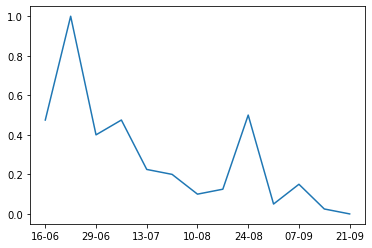

In [308]:
tweetsNormalizados = getCity(cityAnalyzed)

#normaliza dados
tweetsNormalizados=(tweetsNormalizados-tweetsNormalizados.min())/(tweetsNormalizados.max()-tweetsNormalizados.min())

tweetsNormalizados.plot(kind="line")
plt.show()

In [309]:
def groupCovid(df, start, end):
    #agrupa casos por semana
    df = df.sort_values(by="Data")
    df = df[(df['Data'] >= start) & (df['Data'] <= end)]
    
    groupedByWeek = df.groupby(df['Data'].dt.strftime('%W'))['casos']
    
    return groupedByWeek.sum()

### Analisa os dados de covid da cidade no mesmo período das análises de tweets, e plota o mesmo gráfico

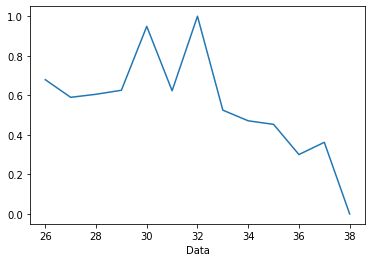

In [310]:
covidDataByWeek = groupCovid(df, "2020-06-30", "2020-09-21")

#normaliza dados
covidDataByWeek=(covidDataByWeek-covidDataByWeek.min())/(covidDataByWeek.max()-covidDataByWeek.min())

covidDataByWeek.plot(kind="line")
plt.show()

### Cria um dataframe com as duas séries plotadas anteriormente

In [311]:
dfTweets = pd.DataFrame({'data':tweetsNormalizados.index, 'tweets na semana':tweetsNormalizados.values})
dfTweets["id"] = dfTweets.index + weeksAfter #compara com casos X semanas seguintes

dfCasos = pd.DataFrame({'semana':covidDataByWeek.index, 'casos de covid na semana':covidDataByWeek.values})
dfCasos["id"] = dfCasos.index
dfCasos

semana  casos de covid na semana  id
0      26                  0.679122   0
1      27                  0.589816   1
2      28                  0.605227   2
3      29                  0.625511   3
4      30                  0.948710   4
5      31                  0.623004   5
6      32                  1.000000   6
7      33                  0.524926   7
8      34                  0.470990   8
9      35                  0.453073   9
10     36                  0.300408  10
11     37                  0.362189  11
12     38                  0.000000  12

### Une os dois datasets em um dataset somente, que é usado para fins de comparação

In [312]:
dadosAgrupados = pd.concat([dfTweets])
dadosAgrupados = pd.merge(dadosAgrupados, dfCasos, on='id')
dadosAgrupados = dadosAgrupados[['data', 'semana', 'tweets na semana', 'casos de covid na semana']]
dadosAgrupados

data semana  tweets na semana  casos de covid na semana
0  16-06     29             0.475                  0.625511
1  22-06     30             1.000                  0.948710
2  29-06     31             0.400                  0.623004
3  06-07     32             0.475                  1.000000
4  13-07     33             0.225                  0.524926
5  20-07     34             0.200                  0.470990
6  10-08     35             0.100                  0.453073
7  18-08     36             0.125                  0.300408
8  24-08     37             0.500                  0.362189
9  01-09     38             0.050                  0.000000

### Printa a matriz de correlação entre os tweets com os casos de covid

In [313]:
dadosAgrupados.corr()

tweets na semana  casos de covid na semana
tweets na semana                  1.000000                  0.747133
casos de covid na semana          0.747133                  1.000000

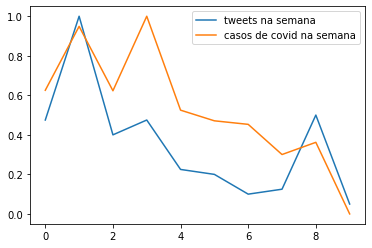

In [314]:
dadosAgrupados.plot(kind="line")
plt.show()